# Setup

In [1]:
from anastruct import SystemElements
import difflib


ss = SystemElements()

# Inputs

##### Exemplo Feito

In [ ]:
# Exemplo Feito
# Barras location = [x1, y1], [x2, y2]
ss.add_element(location=[[0, 0], [0, 2]])  # Barra 1
ss.add_element(location=[[0, 2], [0, 4]])  # Barra 2
ss.add_element(location=[[0, 4], [3, 4]])  # Barra 3
ss.add_element(location=[[3, 4], [4, 4]])  # Barra 4
ss.add_element(location=[[4, 4], [6, 4]])  # Barra 5
ss.add_element(location=[[6, 4], [7, 4]])  # Barra 6

ss.add_internal_hinge(node_id=3)
ss.add_internal_hinge(node_id=5)

ss.add_support_fixed(node_id=1)
ss.add_support_roll(node_id=4)
ss.add_support_roll(node_id=6)

ss.point_load(node_id=2, Fx=+5)
ss.q_load(q=-2, element_id=3)
ss.q_load(q=-2, element_id=4)
ss.point_load(node_id=7, Fy=-10)

##### Input do Usuário

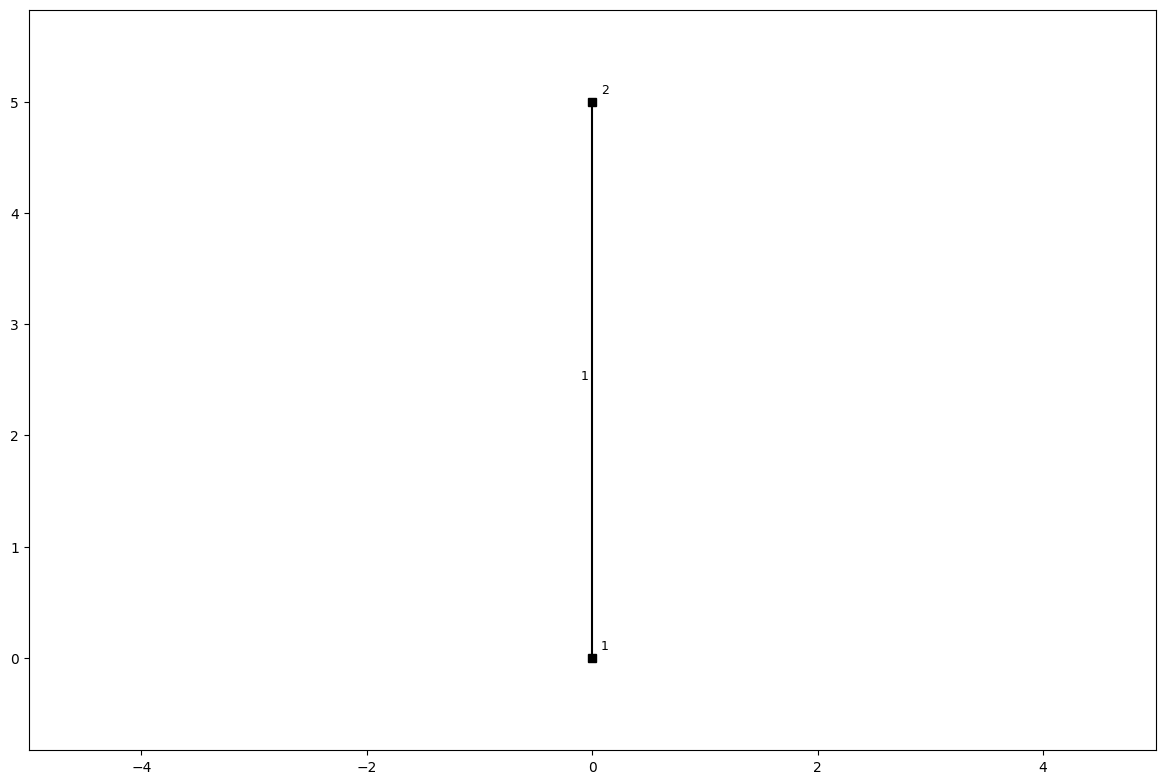

In [2]:
# Adicione uma barra
apoio = input("Digite início e fim da barra no formato x1, y1, x2, y2")
apoio = apoio.split(" ")
x1, y1, x2, y2 = float(apoio[0]), float(apoio[1]), float(apoio[2]), float(apoio[3])
ss.add_element(location=[[x1, y1], [x2, y2]])

ss.show_structure()

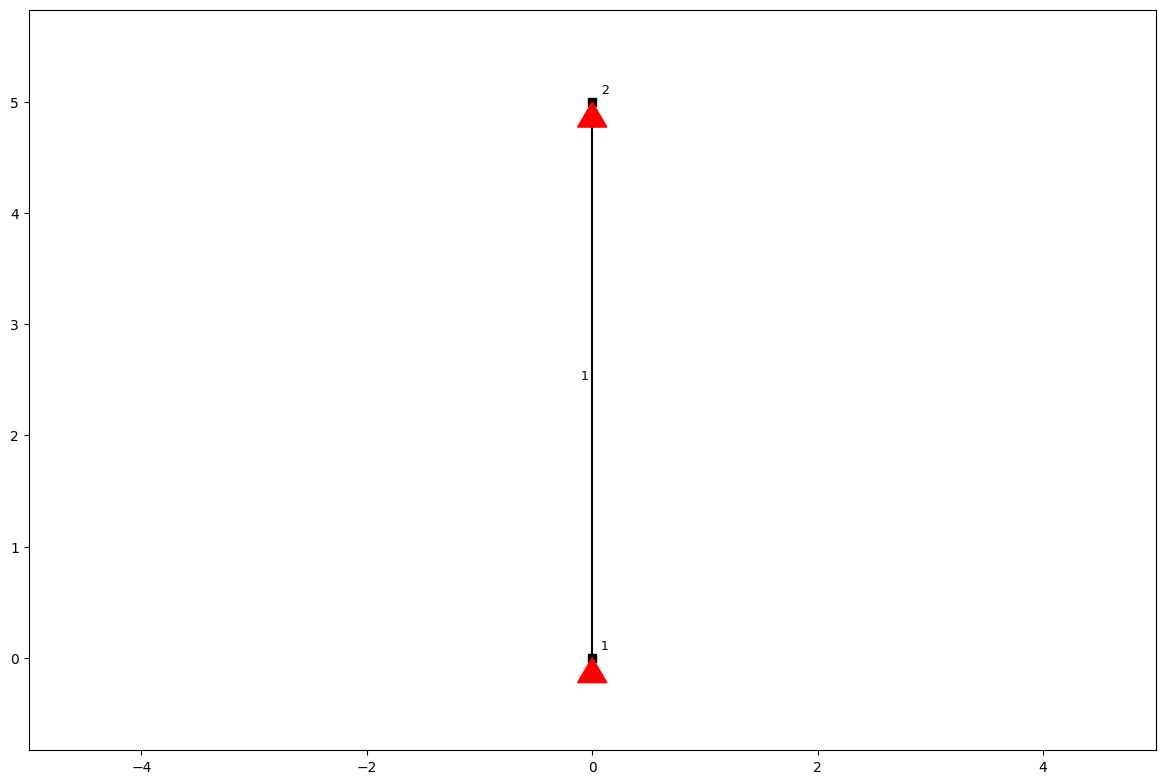

In [4]:
# Adicione um apoio
apoio = input("Digite um tipo de apoio entre (apoio simples, apoio móvel, articulação, engaste)")

# Lista de opções válidas
apoios_validos = ["apoio simples", "apoio móvel", "articulação", "engaste"]

# Função para encontrar a opção mais próxima
def find_closest_option(user_input, options):
    closest_matches = difflib.get_close_matches(user_input, options, n=1, cutoff=0.6)
    if closest_matches:
        return closest_matches[0]
    else:
        return None

# Encontrar a opção mais próxima
apoio = find_closest_option(apoio, apoios_validos)

if apoio == None:
    print("Apoio inválido. Tente novamente.")

elif(apoio == "apoio simples"):
    id = input("Adicione o ID do nó onde deseja colocar o suporte:")
    id = int(id)
    ss.add_support_hinged(node_id=id)

elif(apoio == "apoio móvel"):
    id = int(input("Adicione o ID do nó onde deseja colocar o suporte:"))
    direction = input("Adicione ax direção sem restrição de movimento (x ou y):")
    ss.add_support_roll(node_id=id, direction=1 if direction == "x" else 2)

elif(apoio == "articulação"):
    id = input("Adicione o ID do nó onde deseja colocar o suporte:")
    id = int(id)
    ss.add_internal_hinge(id)

elif(apoio == "engaste"):
    id = int(input("Adicione o ID do nó onde deseja colocar o suporte"))
    ss.add_support_fixed(id)

In [ ]:
# Adicione uma carga distribuída

In [ ]:
# Adicione uma pontual


# Resultados

In [ ]:
# Mostrar estrutura
ss.show_structure()

In [ ]:
# Calcular
ss.solve()

In [ ]:
# Plot resultados gerais
ss.show_results()

In [ ]:
# Reações de Apoio
ss.show_reaction_force()

In [ ]:
# Normal
ss.show_axial_force()

In [ ]:
# Cortante
ss.show_shear_force()

In [ ]:
# Momento Fletor
ss.show_bending_moment()